In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import HTC

In [2]:
# Load the serialized output from the simulation
output=pickle.load(open('ouput_15_giugno.bin','rb'))
attempts=pickle.load(open('attempts_15_giugno.bin', 'rb'))

In [3]:
n_attempts=len(attempts)
attempts

{0: 5, 5: 5, 10: 5, 20: 5, 30: 5, 40: 5, 60: 5, 100: 5}

In [4]:
# Take the mean of the different attempts with the same connectome (as suggested by Giacomo)
a_f=np.zeros((n_attempts,len(output[0][0]['activity']) ))
sigma_a_f=np.zeros((n_attempts,len(output[0][0]['sigma_activity']) ))
s1_f=np.zeros((n_attempts,len(output[0][0]['s1']) ))
s2_f=np.zeros((n_attempts,len(output[0][0]['s2']) ))
rho_f=np.zeros((len(output),len(output[0][0]['tc'])))
chi_f=np.zeros((len(output),len(output[0][0]['tc'])))

# The temporary containers for the simulated data
a=np.zeros(((len(output[1])),len(output[1][0]['activity'])))
sigma_a=np.zeros(((len(output[1])),len(output[1][0]['sigma_activity'])))
s1=np.zeros((len(output[1]),len(output[1][0]['s1'])))
s2=np.zeros((len(output[1]),len(output[1][0]['s2'])))
rho=np.zeros((len(output[0]),len(output[0][0]['tc'])))
chi=np.zeros((len(output[0]),len(output[0][0]['tc'])))

for j in range(len(output)):
    for i in range(len(output[j])):
        a[i]=output[j][i]['activity']
        sigma_a[i]=output[j][i]['sigma_activity']
        s1[i]=output[j][i]['s1']
        s2[i]=output[j][i]['s2']
        
    a_f[j]=np.mean(a, axis=0)
    sigma_a_f[j]=np.mean(sigma_a, axis=0)
    s1_f[j]=np.mean(s1, axis=0)
    s2_f[j]=np.mean(s2, axis=0)


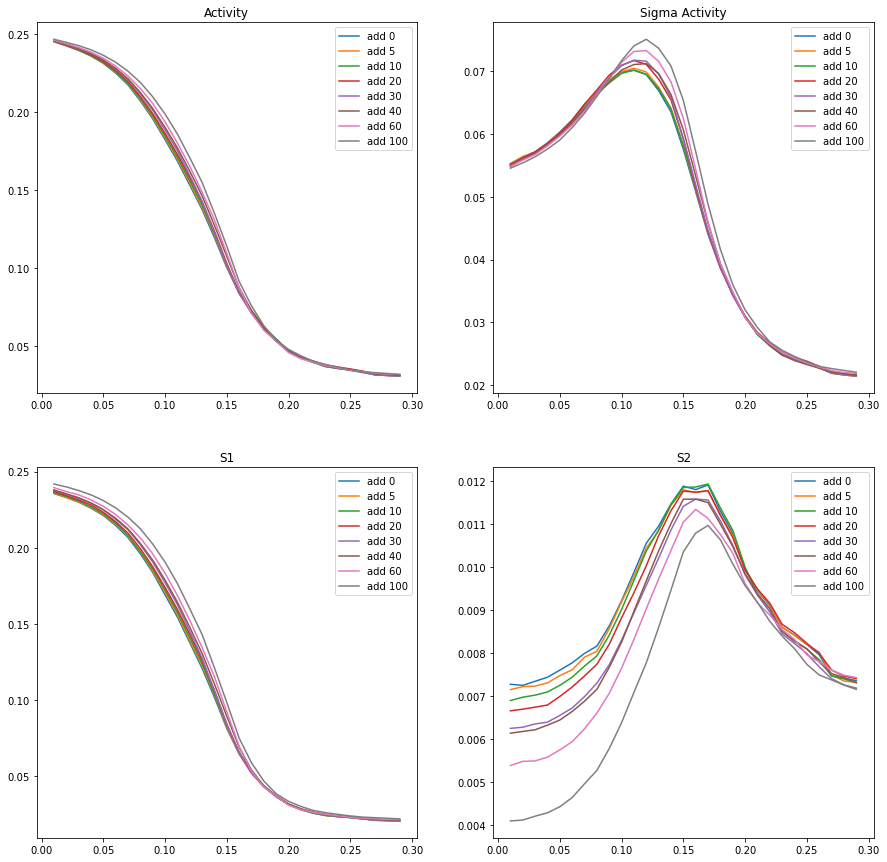

In [5]:
# Plot all the interesting observables
fig,ax=plt.subplots(2,2, figsize=(15,15))

for i,j in enumerate(attempts):
    ax[0,0].plot(output[0][0]['tc'],a_f[i], label='add '+str(j))
    ax[0,0].legend()
    ax[0,0].set_title('Activity')
    ax[0,1].plot(output[0][0]['tc'],sigma_a_f[i], label='add '+str(j))
    ax[0,1].legend()
    ax[0,1].set_title('Sigma Activity')
    ax[1,0].plot(output[0][0]['tc'],s1_f[i]/66, label='add '+str(j))
    ax[1,0].legend()
    ax[1,0].set_title('S1')
    ax[1,1].plot(output[0][0]['tc'],s2_f[i]/66, label='add '+str(j))
    ax[1,1].legend()
    ax[1,1].set_title('S2')

In [6]:
for i in range(len(output)):
    rho,chi = HTC.rho_chi_added_weights( output[i], 'set')
    rho_f[i]=np.mean(rho,axis=0)
    chi_f[i]=np.mean(chi,axis=0)

/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:184: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


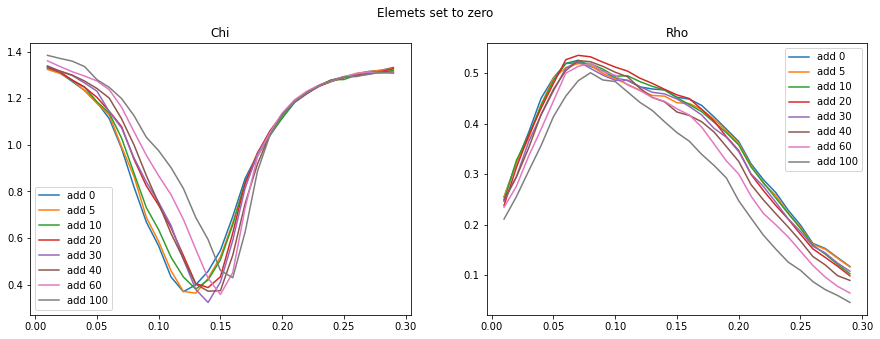

In [7]:
fig,ax=plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Elemets set to zero')

for i,j in enumerate(attempts):
    ax[0].plot(output[0][0]['tc'], chi_f[i], label='add '+str(j))
    ax[0].legend()
    ax[0].set_title('Chi')
    ax[1].plot(output[0][0]['tc'], rho_f[i], label='add '+str(j))
    ax[1].set_title('Rho')
    ax[1].legend()

In [8]:
for i in range(len(output)):
    rho,chi = HTC.rho_chi_added_weights( output[i], 'upper')
    rho_f[i]=np.mean(rho,axis=0)
    chi_f[i]=np.mean(chi,axis=0)


/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:184: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


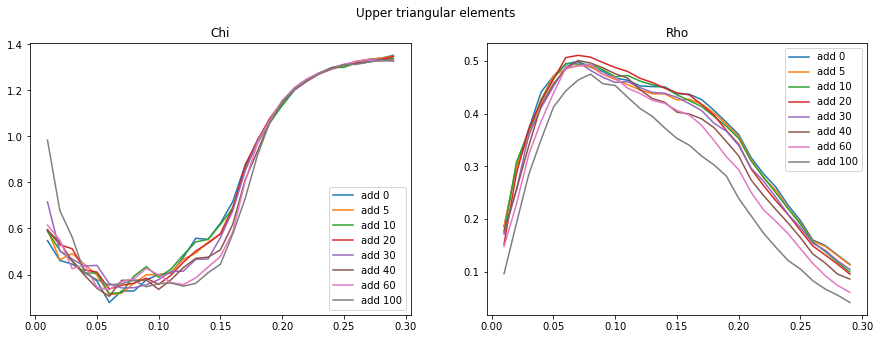

In [9]:
fig,ax=plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Upper triangular elements')

for i,j in enumerate(attempts):
    ax[0].plot(output[0][0]['tc'], chi_f[i], label='add '+str(j))
    ax[0].legend()
    ax[0].set_title('Chi')
    ax[1].plot(output[0][0]['tc'], rho_f[i], label='add '+str(j))
    ax[1].set_title('Rho')
    ax[1].legend()

In [10]:
for i in range(len(output)):
    rho,chi = HTC.rho_chi_added_weights( output[i], 'zeroes')
    rho_f[i]=np.mean(rho,axis=0)
    chi_f[i]=np.mean(chi,axis=0)


/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:184: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


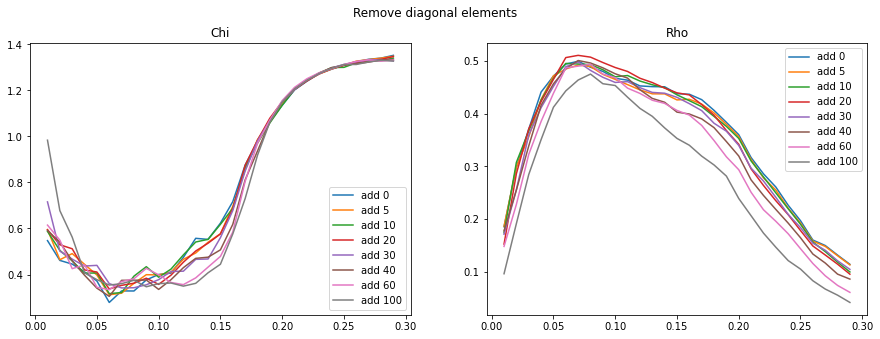

In [11]:
fig,ax=plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Remove diagonal elements')

for i,j in enumerate(attempts):
    ax[0].plot(output[0][0]['tc'], chi_f[i], label='add '+str(j))
    ax[0].legend()
    ax[0].set_title('Chi')
    ax[1].plot(output[0][0]['tc'], rho_f[i], label='add '+str(j))
    ax[1].set_title('Rho')
    ax[1].legend()